In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Load tax data as CSV

In [66]:
df = pd.read_csv("../data/tax-data-2023.5-mit-werbungskosten.csv")
df.head()

,monthly gross income,net income,social security payments,income tax
0,0,0.0,0.0,0.0
1,100,79.0,21.0,0.0
2,200,158.0,42.0,0.0
3,300,237.0,63.0,0.0
4,400,316.0,84.0,0.0


## Fit polynomes to different netto ranges

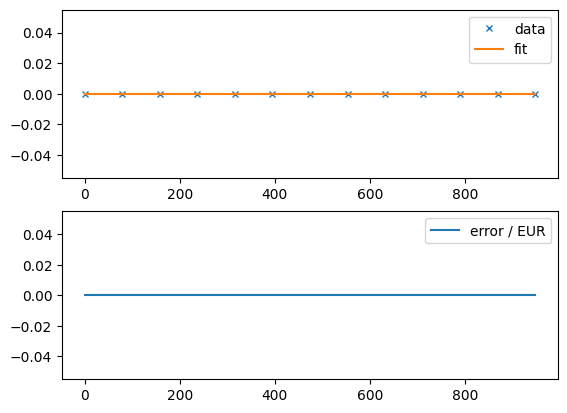

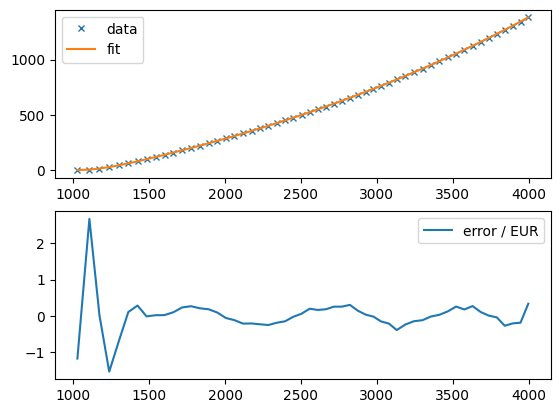

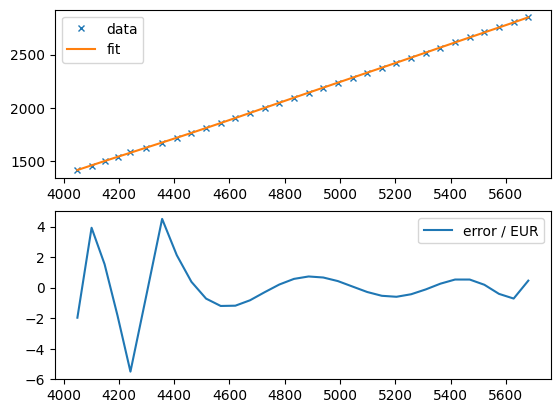

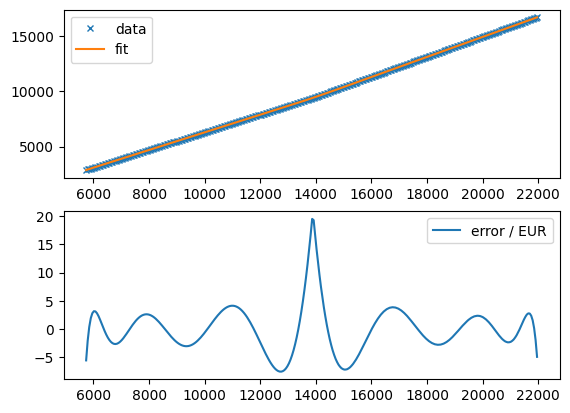

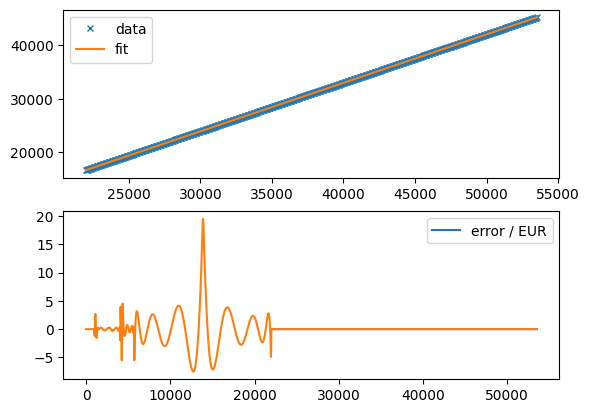

In [67]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 1021,
        "degree": 0,
    },
    {
        "from": 1021,
        "to": 4000,
        "degree": 8,
    },
    {
        "from": 4000,
        "to": 5700,
        "degree": 8,
    },
    {
        "from": 5700,
        "to": 22000,
        "degree": 12,
    },
    {
        "from": 22000,
        "to": 100000,
        "degree": 1,
    }
]

netToTaxPolynomes= []
netIncomeSamples = []
taxSamples = []
estimationSamples = []
estimationErrors = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left') 
    netIncomes = df[selector]['net income'].to_numpy()
    taxes = df[selector]['income tax'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    taxSamples = np.append(taxSamples, taxes)

    poly,residuals,_,_,_ = np.polyfit(netIncomes, taxes, deg=r['degree'], full = True)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, taxes, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, taxes)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()
    
    poly = poly.tolist()
    poly.reverse()
    netToTaxPolynomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)

## Social Security Estimation

[1.01959353e-26]
[52.5272026]
[0.29901939]
[112.23931257]


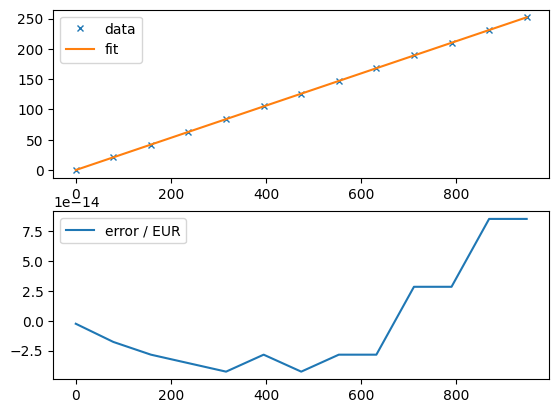

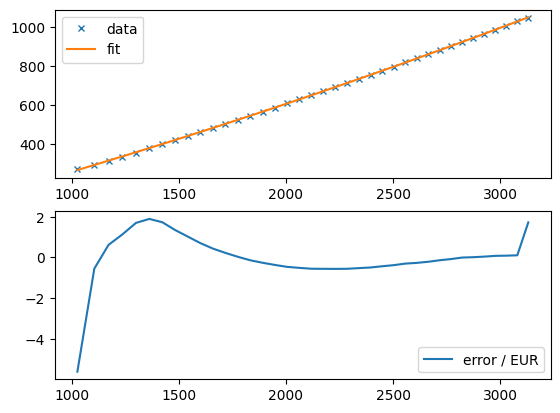

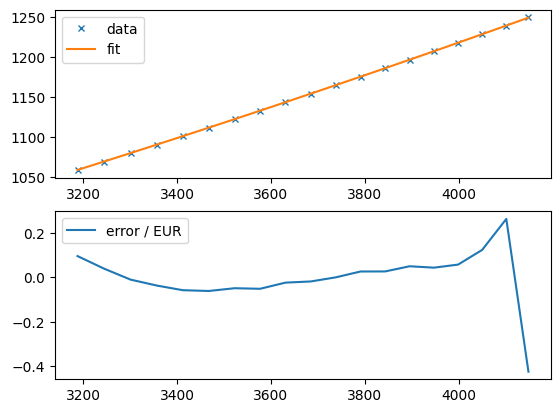

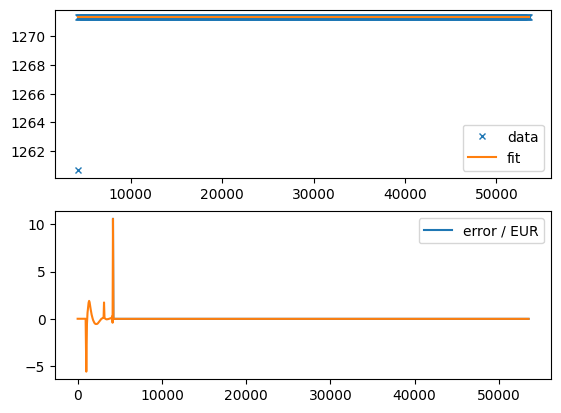

In [68]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 953,
        "degree":2, 
    },
    {
        "from": 953,
        "to": 3142,
        "degree": 2,
    },
    {
        "from": 3142,
        "to": 4192,
        "degree": 2,
    },
    {
        "from": 4192 ,
        "to": 100000,
        "degree": 0,
    },
]

netIncomeSamples = []
socialSecuritySamples = []
estimationSamples = []
estimationErrors = []
socialSecurityPolonomes = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left') 
    netIncomes = df[selector]['net income'].to_numpy()
    ssocialPayments = df[selector]['social security payments'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    socialSecuritySamples = np.append(socialSecuritySamples, ssocialPayments)

    poly,residuals,_,_,_ = np.polyfit(netIncomes, ssocialPayments, deg=r['degree'], full = True)
    print(residuals)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, ssocialPayments, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, ssocialPayments)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()
    
    poly = poly.tolist()
    poly.reverse()
    socialSecurityPolonomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)

## Export polynomes to be used in JS Library

In [69]:
polynomesJSON = json.dumps({
        "netToTax": netToTaxPolynomes,
        "netToSocialSecurity": socialPaymentsPolynomes,
    })
print(polynomesJSON)

with open("../src/polynomes-mit-werbungskosten.json", "w") as outfile:
    outfile.write(polynomesJSON)

{"netToTax": [{"from": 0, "to": 1021, "polynome": [-0.0]}, {"from": 1021, "to": 4000, "polynome": [5012.596701902607, -17.53481855207137, 0.025486850270052326, -2.04652870757949e-05, 1.009311067387237e-08, -3.126605481858093e-12, 5.9480129006573e-16, -6.359609525016579e-20, 2.9290849142456846e-24]}, {"from": 4000, "to": 5700, "polynome": [101646962.58818993, -171499.44066318034, 126.25138063890603, -0.052967315908877294, 1.3851861931846482e-05, -2.3123237607950446e-09, 2.406264369898413e-13, -1.4272155021627598e-17, 3.6941961018747803e-22]}, {"from": 5700, "to": 22000, "polynome": [-1778584.754087431, 1921.8148597002007, -0.9314458263897347, 0.00026780419636759104, -5.085111674078918e-08, 6.71907050206639e-12, -6.336794663491158e-16, 4.2999639628573676e-20, -2.084872994321389e-24, 7.049210988496973e-29, -1.5789486306822394e-33, 2.1054878825302726e-38, -1.2651725231869457e-43]}, {"from": 22000, "to": 100000, "polynome": [-3173.874972216834, 0.9038553069965247]}], "netToSocialSecurity": 